## PHY 411: Final Project
### Jeremy Kazimer
### jdkazime@buffalo.edu

#### _Import Statements_

To begin this portion of the project, we import the Python files I created which contains the network class and its methods, including entropy:

In [1]:
import sys
sys.path.insert(1, 'utility/')

from generate_network import *
from calculate_entropy import *

Consider that an explanation of the code is partially within the .py itself, but also in the documentation on GitHub.  We can also import `numpy` and `matplotlib` such that we can use their code here:

In [2]:
from numpy import arange, array, linspace, log2, mean, zeros
from matplotlib import pyplot as plt

As always, we can begin by generating a network:

#### _Generating Networks_

Using the same theory from the `network_analysis.ipynb` notebook, we can create a network with parameters $N = 100$ and $p = 0.25$:

In [3]:
N = 100
p = 0.25

In [4]:
G = Erdos_Renyi_GNP(N, p)

Now, we can begin some preliminary analysis.  First, of course, on the network structure itself:

#### _Monte Carlo Simulation on Number of Edges_

Fundamentally, a random graph is defined by its network size $N$ and edge probability $p$.  However, a quantity necessary in forming a graph is the set of edges and subsequently the number of said edges.  Since the number of edges is itself not set as a parameter, there is not exactly a definitive number of edges.  

Although, people working in network theory have derived an approximation for the mean number of edges $\bar{M}$ such that
\begin{equation}
\bar{M} \approx \dfrac{N(N - 1)}{2} \cdot p
\end{equation}

Since $\frac{N(N - 1)}{2}$ represents the number of possible edges for an undirected and unweighted graph, multiplying it by the probability would give the mean number of edges.  Note that this quantity is known; so we cannot exactly apply a Monte Carlo simulation in good faith here.  However, we can use Monte Carlo as a framework to verify that, for any network, this approximation is strong.  As such, we can begin by looking at one case, with our initial graph:

In [5]:
max_edges = lambda N: N*(N - 1)/2

In [6]:
print('theoretical number of edges: {}'.format(max_edges(G.N) * G.p))

theoretical number of edges: 1237.5


In [7]:
print('actual number of edges: {}'.format(G.M))

actual number of edges: 1206.0


So, it's fairly close, but not quite.  To better approximate this, we can easily just generate $n$ different graphs for the parameters $N = 100$ and $p = 0.25$ so that we can compare the average of the set of $n$:

In [8]:
n = 100
Ms = zeros(n)

for i in range(n):
    G1 = Erdos_Renyi_GNP(N, p)
    Ms[i] = G1.M

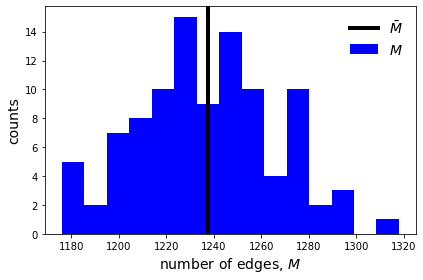

In [9]:
fig, ax = plt.subplots(1, 1)

ax.hist(Ms, 15, color = 'blue', label = '$M$')
ax.set_ylabel('counts', fontsize = 14)
ax.set_xlabel('number of edges, $M$', fontsize = 14)

ax.axvline(Ms.mean(), lw = 4, c = 'k', label = r'$\bar{M}$')

ax.legend(loc = 'upper right', fontsize = 14, frameon = False)

fig.tight_layout();

In [10]:
print('actual number of edges: {}'.format(Ms.mean()))

actual number of edges: 1237.51


So, the number is much closer! If $n$ is increased, then certainly this number will be better.  But how does it scale for different network sizes, different probabilities?

In [27]:
Ns = arange(2, N, 4)
Ms = zeros((n, Ns.shape[0]))

for i in range(n):
    for j, N in enumerate(Ns):
        G1 = Erdos_Renyi_GNP(N, p)
        Ms[i, j] = G1.M

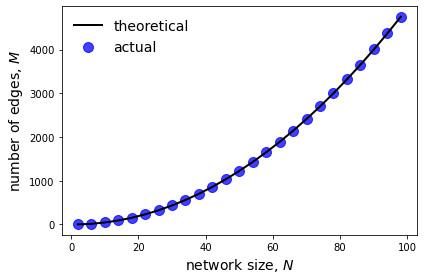

In [28]:
fig, ax = plt.subplots(1, 1)

ax.plot(Ns, max_edges(Ns)*p, lw = 2, c = 'k', label = 'theoretical')
ax.scatter(Ns, Ms.mean(axis = 0), c = 'blue', s = 100, alpha = 0.75, label = 'actual')

ax.set_ylabel('number of edges, $M$', fontsize = 14)
ax.set_xlabel('network size, $N$', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14, frameon = False)

fig.tight_layout();
fig.savefig('figures/edges_vs_networksize.png')

This seems to be verified, but what about on edge probability?

In [29]:
N = 100
ps = linspace(0, 1, 20)
Ms = zeros((n, ps.shape[0]))

for i in range(n):
    for j, p in enumerate(ps):
        G1 = Erdos_Renyi_GNP(N, p)
        Ms[i, j] = G1.M

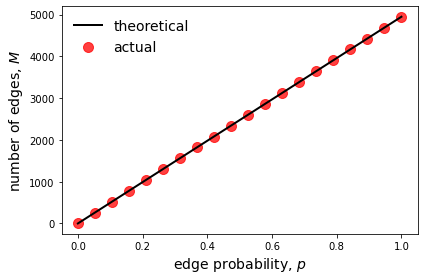

In [30]:
fig, ax = plt.subplots(1, 1)

ax.plot(ps, max_edges(N)*ps, lw = 2, c = 'k', label = 'theoretical')
ax.scatter(ps, Ms.mean(axis = 0), c = 'red', s = 100, alpha = 0.75, label = 'actual')

ax.set_ylabel('number of edges, $M$', fontsize = 14)
ax.set_xlabel('edge probability, $p$', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14, frameon = False)

fig.tight_layout();
fig.savefig('figures/edges_vs_probability.png')

Clearly, it is safe to say that these approximations work for large enough $n$.  It is no question that these mathematicians were correct in their formulations.  That aside, Monte Carlo acts as a nice medium to confirm this.  In a way, by using Monte Carlo in such a way, we confirm its validity in working on network frameworks.  By comparing it to known formulations for a random process, we've confirmed that it can be used in such a way.  This will be useful, when we stare into the unknown of networks - where such quantities are unknown.

#### _Monte Carlo Simulations on $H_\beta$_

Since rewiring has been addressed elsewhere in spectral analysis, we can really take it a step further and understanding how entropy changes for an SBM with conditions:
 * $N = 100$
 * $p_{in} = 1.00$
 * $p_{out} = 0.00$
 * $k = 5$
 

 Or, roughly, five communities with 20 nodes each such that they don't interact with other communities.  The reason that we care about entropy now, as opposed to demonstrating spectral analysis, is that entropy here tells us much about community structure.  So, we would imagine as random rewiring undergoes that 
 
 $k = 5 \to k = 1$
 
 for large enough $t$, or rewires.  So, the entropy would be expected to converge such that
 
 $H_\beta \approx \log_2 5 \to H_\beta \approx \log_2 1 = 0$
 
 To demonstrate this, we can create an SBM as such:

In [15]:
N = 100
p_in = 1
p_out = 0.00
k = 5

In [16]:
G = SBM(N, p_in, p_out, k = k)

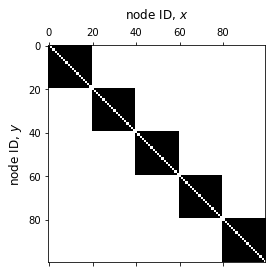

In [17]:
fig, ax = G.plot_graph()

In [18]:
log2(k)

2.321928094887362

And we can demonstrate this behavior for, say, 500 rewires and 50 different iterations of a graph with the same initial conditions.  We fix $\beta = 1$, since that behavior is explained elsewhere.  Nevertheless:

In [23]:
# rewires
t = 500

# iterations
i = 50

# storing entropy
H = zeros((i, t + 1))

for idx in range(i):
    print('on iteration: {}'.format(idx + 1), '\r', end = '')
    G = SBM(N, p_in, p_out, k = k)
    H[idx, 0] = b_entropy(G).sum()
    for jdx, rewire in enumerate(range(t)):
        G.rewire_graph()
        H[idx, jdx + 1] = b_entropy(G).sum()

And, assessing the damage after rewiring:

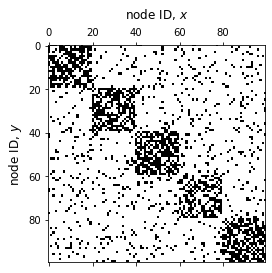

In [24]:
fig, ax = G.plot_graph()

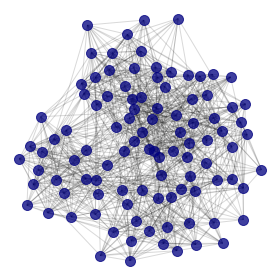

In [25]:
fig, ax = G.plot_networkx()

Visually, these of course don't appear to be one solid community, so what will our results tell us? And to see our results, we can plot this side-by-side with the anticipated number of communities:

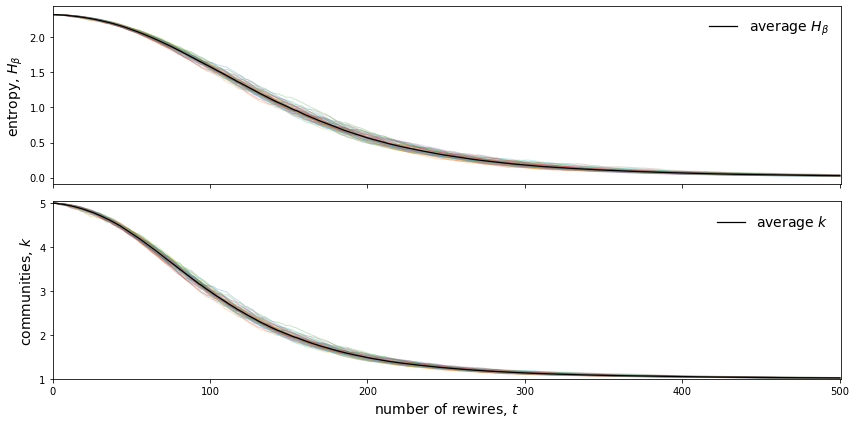

In [31]:
fig, axs = plt.subplots(2, 1, figsize = (12, 6), sharex = True)

rewires = range(t + 1)
axs[0].plot(rewires, H.T, lw = 1, alpha = 0.25)
axs[0].plot(rewires, H.mean(axis = 0), lw = 1.25, c = 'k', label = r'average $H_\beta$')
axs[0].set_ylabel(r'entropy, $H_\beta$', fontsize = 14)
axs[0].legend(loc = 'upper right', fontsize = 14, frameon = False)

axs[1].plot(rewires, 2**H.T, lw = 1, alpha = 0.25)
axs[1].plot(rewires, 2**H.mean(axis = 0), lw = 1.25, c = 'k', label = r'average $k$')
axs[1].set_ylabel(r'communities, $k$', fontsize = 14)
axs[1].set_xlabel(r'number of rewires, $t$', fontsize = 14)
axs[1].legend(loc = 'upper right', fontsize = 14, frameon = False)

axs[1].set_ylim(1, 1.01*k)
axs[1].set_xlim(0, t + 1)

fig.tight_layout()
fig.savefig('figures/entropy_vs_rewiring.png')

Great! So our behavior is exactly as anticipated.  Note that the near translucent lines are the different trials, since that wasn't specified in the legend.  Regardless, this basically affirms the original claim.  As such, we can move onto bigger things, but not in this notebook...